# for 2022.10.02, we will observe back-up for the first few hours and then switch to main program

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from astropy import coordinates
from astropy import units as u
from skipper import observe, planner

In [3]:
import sys
sys.path.append('../scripts/')

In [4]:
import sigjson_f2022b
import our_pointings

In [5]:
obsdates = sigjson_f2022b.obsdates

obskeys = [ f'{x[0]:02d}-{x[1]:02d}-{x[2]:02d}' for x in obsdates[:,:3]]

def wrapRA(ra, wrap_point=180.):
    mask = ra >= wrap_point
    wrapped_ra = ra.copy()
    wrapped_ra[mask] -= 360.
    return wrapped_ra

In [6]:
tele_fname = '/Users/kadofong/Downloads/tele20220930.csv'
copilot_fname = '/Users/kadofong/Downloads/db_merian.fits'

In [7]:
obsdates = sigjson_f2022b.obsdates
obsfilters = sigjson_f2022b.obsfilters

oiii_nights = obsdates[obsfilters == 'N540', :-1]
halpha_nights = obsdates[obsfilters=='N708',:-1]

In [8]:
hcat, ocat = our_pointings.load_fallfields ()

coo_o = observe.CopilotOutput ( copilot_fname, ocat, skySB_0=22.1 )
coo_h = observe.CopilotOutput ( copilot_fname, hcat, skySB_0=21. )

# OIII observations

In [9]:
night = [2022, 10, 2]

In [14]:
#night = oiii_nights[3]

dt = f'{night[0]}{night[1]:02d}{night[2]:02d}' #20220920
if not os.path.exists ( f'../json/{dt}'):
    os.mkdir(f'../json/{dt}')
    
stdout = sys.stdout
with open(f'../json/{dt}/output.log','w') as f:#sys.stdout:
    is_queued = sigjson_f2022b.plan_tomorrow( night[2], night[1], night[0], tele_fname, 
                                             copilot_fname, mfilt='N540', is_queued=None, #slot=slot,
                                             pad_last_hour=True, maxairmass=1.8, save=False, verbose=True)
sys.stdout = stdout

#os.rename( f'../json/{dt}', f'../json/{dt}_intermediateOIII')

DAY:       2
MONTH:     10
YEAR:      2022
TELEFILE:  /Users/kadofong/Downloads/tele20220930.csv
COPILOT:   /Users/kadofong/Downloads/db_merian.fits
.         *          
    *    .        *        .   .     .
      ____            .    {\*/}           .  *     .
  . .___\\`.  .         *   >!<      . 
    |   .. |     .         (/^\)   
    |------|          *    '   '      *
    |    _ |                      *
  _ '__ |_|'_	        SKIPPER
/       //   \        [MERIAN OBSPLANNER]
       //      \_ _    
       \\            \_ .  _  .
_______________ _  _ __ _  __      _  .   .

[verify_synchronicity] last exposure in logs is 1136946, taken at 2022-10-01 09:08:53.715912+00:00
On 2022/10/2, we are observing None in N540
We are observing the full of the night
3 pointings in this catalog need reobservation!


[predict] night slot: Full night
obsStart: 2022/10/02 08:48 PM Santiago
          2022/10/02 07:48 PM ET
          2022/10/02 04:48 PM PT
          2022/10/02 11:48 PM UTC
obsEnd:   2022/10/03 06:17 AM Santiago
          2022/10/03 05:17 AM ET
          2022/10/03 02:17 AM PT
          2022/10/03 09:17 AM UTC
Moon illumination is: 0.52
Moon max altitude during observation is: 74.46
[plan_night] Inferring priorities from object names



(Minimum airmass available: 1.7035821196370997)
(720s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.3721558907422153)
==> 20221003_00, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=5.0 objects

(Minimum airmass available: 1.2632901308349709)
==> 20221003_01, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=5.0 objects

(Minimum airmass available: 1.198120621437579)
==> 20221003_02, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=5.0 objects

(Minimum airmass available: 1.1870038105733545)
==> 20221003_03, 3600.0s available
900.0s filled b

 .   . 
 {\*/} 
  >!<  BACKUP FIELD INFO
 (/^\) 
 '   ' 
time (UTC)    11:30     12:30     01:30     02:30     03:30     04:30     05:30     06:30     07:30     08:30     09:30     
SXDS          -6.74     13.11     3.35      1.99      1.48      1.24      1.13      1.11      1.16      1.31      1.61      
COSMOS        -1.41     -1.22     -1.14     -1.14     -1.23     -1.43     -1.87     -2.95     -8.36     9.39      3.09      
GH14          4.96      -45.18    -4.06     -2.19     -1.57     -1.29     -1.16     -1.12     -1.16     -1.28     -1.55     
NSA15235      4.38      180.57    -4.56     -2.32     -1.63     -1.32     -1.18     -1.13     -1.16     -1.28     -1.54     
GAMA5220386   1.32      1.14      1.04      1.00      1.02      1.09      1.23      1.48      1.98      3.10      7.31      
GAMA5275222   1.39      1.17      1.06      1.01      1.01      1.06      1.18      1.40      1.82      2.72      5.53      
GAMA5265117   1.39      1.17      1.05      1.00      1.01      1.07

In [13]:
# \\ we're only going to use the second hour (UTC 01)
hours_to_transfer = ['20221001_00', '20221001_01']
going_to_observe = is_queued.loc[np.isfinite(is_queued['qstamp'])]

NameError: name 'is_queued' is not defined

NameError: name 'going_to_observe' is not defined

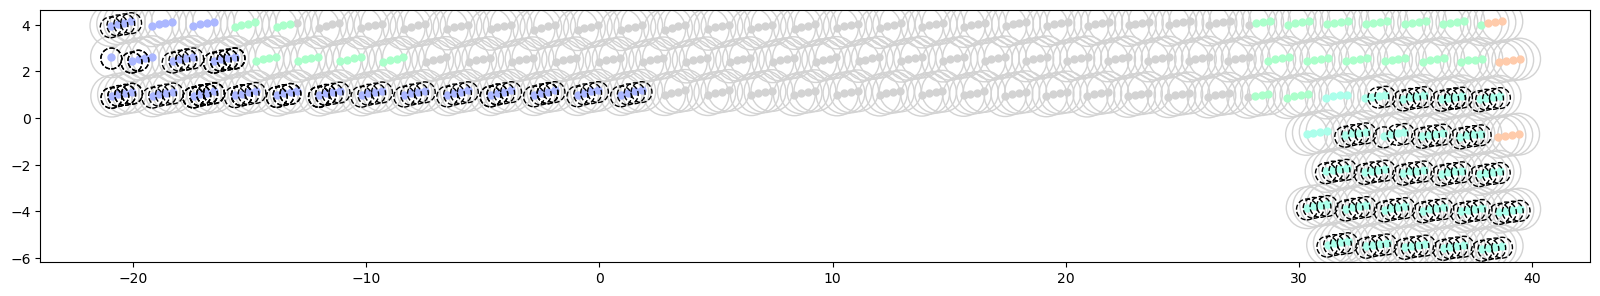

In [12]:
fields = ocat['object'].str.extract(r'(.*?(?=_))')[0]

fig = plt.figure(figsize=(20,4))
ax = plt.subplot(111)
ax.set_aspect('equal')

cc_l = ['#abb7ff','#abffeb','#abffcb','#feffab','#ffcbab','lightgrey']
#['tab:red','tab:blue','tab:green','tab:purple','grey','tab:orange']
#['#abb7ff','#abffeb','#abffcb','#feffab','#ffcbab','lightgrey']

plt.scatter ( wrapRA(hcat['RA']), hcat['dec'], facecolor='None', edgecolor='lightgrey', s=30**2)
for field in fields.unique():
    cat = ocat.loc[fields==field]
    idx = sigjson_f2022b._field_priorities[field]
    plt.scatter ( wrapRA(cat['RA']), cat['dec'], c=cc_l[idx], s=5**2)
    
plt.scatter ( wrapRA(coo_o.merian_sidecar['racenter']), coo_o.merian_sidecar['deccenter'], 
             facecolor='None', edgecolor='k', s=15**2, ls='--' )
#plt.scatter ( wrapRA( ocat.loc[beforelastnight, 'RA'] ), wrapRA(ocat.loc[beforelastnight, 'dec']), facecolor='tab:orange', s=10**2, alpha=0.5 )

#plt.scatter ( wrapRA( ocat.loc[lastnightobjects, 'RA'] ), wrapRA(ocat.loc[lastnightobjects, 'dec']), facecolor='tab:green', s=5**2, alpha=0.5 )


# \\ show pointings that need reobservation
#needs_reobservation = ocat.loc[np.in1d(ocat['object'],reobs)]
#plt.scatter ( wrapRA ( needs_reobservation['RA'] ), wrapRA( needs_reobservation['dec'] ), color='tab:blue', s=15**2 )

going_to_observe['odate'] = going_to_observe.apply(lambda x: x['qstamp'].split("_")[0], axis=1)

#grps = going_to_observe.groupby('odate')
#for idx,(name,grp) in enumerate(grps):
#    cc = plt.cm.Dark2(idx/grps.ngroups)
#    plt.scatter ( wrapRA(ocat.reindex(grp.index)['RA']), ocat.reindex(grp.index)['dec'], facecolor='None', edgecolor=cc, s=18**2, lw=1 )
#    print(grp.shape[0])
plt.scatter ( wrapRA(ocat.reindex(going_to_observe.index)['RA']), ocat.reindex(going_to_observe.index)['dec'], 
             facecolor='None', edgecolor='r', s=18**2, lw=1 )

#plt.axvline(38.)
plt.title('N540')
plt.tight_layout ()
#plt.savefig('/Users/kadofong/Downloads/N540_20220930_prediction.png')

# Copy [OIII] observation to H$\alpha$

In [32]:
night = halpha_nights[3]

year = night[0]
month = night[1]
day = night[2]
#lastobs_day = day - 2
print(year,month,day)

2022 9 30


In [33]:
tele = pd.read_csv(tele_fname, index_col=0)
tele_dt = pd.to_datetime(tele['date'])
lastnight = pd._libs.tslibs.timestamps.Timestamp(year=year, month=month, day=lastobs_day, tz='UTC')

In [34]:
# \\ only allow for OIII footprint
observed_last_night = tele['object'] #.loc[tele_dt.apply(lambda x: x > lastnight),'object']

In [35]:
# \\ need to match OIII planned observations to Halpha catalog

# \\ load N708 & N540 pointings
halpha_locations = coordinates.SkyCoord( hcat['RA'], hcat['dec'], unit=('deg','deg'))
#planned_oiii_obscoords = coordinates.SkyCoord( ocat.reindex(is_queued.loc[is_queued['is_queued']].index)['RA'], 
#                                               ocat.reindex(is_queued.loc[is_queued['is_queued']].index)['dec'], 
#                                               unit=('deg','deg'))
lastnightobjects = np.in1d(ocat['object'], observed_last_night)
lastnightobjects[np.in1d(ocat.index, going_to_observe.index)] = True

oiii_FLO = coordinates.SkyCoord ( ocat.loc[lastnightobjects, 'RA'],
                                  ocat.loc[lastnightobjects, 'dec'],
                                  unit=('deg','deg') )

# \\ match via coordinates
matchids, sep, _ = oiii_FLO.match_to_catalog_sky ( halpha_locations )
matches = sep < 0.05*u.arcsec

# \\ aggregate all Halpha pointings that are in the OIII queue
nominally_new_inN708 = hcat.index[matchids]
#nominally_new_inN708['qstamp'] = to_obs['qstamp']
# \\ identify which pointings have already been observed in Halpha
already_observed_inN708 = np.in1d(hcat.reindex(nominally_new_inN708)['object'], coo_h.merian_sidecar['object'])
truly_new_inN708 = hcat.reindex(nominally_new_inN708).loc[~already_observed_inN708].copy()
#truly_new_inN708['qstamp'] = is_queued.query('is_queued').loc[~already_observed_inN708, 'qstamp'].values
#truly_new_inN708['object'] = truly_new_inN708['object'].apply ( lambda x: 'OIIIanalog_' + x.split('_')[1] )

# \\ the pointings that "can" be observed should be the truly new in queue
# \\ PLUS XMM pointings, but XMM should be downgraded
hcat_fields = hcat['object'].str.extract(r'(.*?(?=_))')[0]
is_xmm = hcat_fields == 'XMM'
#is_xv = hcat_fields == 'btwnXV'
xmmtogo = hcat.loc[is_xmm].copy ()
xmmtogo['qstamp'] = 'NONE'

hack_cat = pd.concat([truly_new_inN708, xmmtogo])
# \\ remove pointings that are both in XMM and scheduled for 
# \\ OIII observations
hack_cat = hack_cat.loc[~hack_cat.index.duplicated( keep='first')]
hack_cat['qstamp'] = hack_cat['qstamp'].replace(np.NaN, 'NONE')

In [40]:
#is_queued = pd.DataFrame(index=hcat.index, columns=['is_queued','qstamp','airmass'])
halpha_priorities = {'VVDSearly':0, 'VVDSlate':0, 'VVDS':0, 'XMM':100, 'btwnXV':2, 'XMMhigh':4, 'newRAbtwnXV':5}


todaycat = hack_cat

#isqueuedtoday = pd.DataFrame(index=todaycat.index, columns=['is_queued','qstamp','airmass'])      
#isqueuedtoday['is_queued'] = False
dt = f'{night[0]}{night[1]:02d}{night[2]:02d}' #20220920
if not os.path.exists ( f'../json/{dt}'):
    os.mkdir(f'../json/{dt}')
    
stdout = sys.stdout
with open(f'../json/{dt}/output.log','w') as sys.stdout:
    is_queued_halpha = sigjson_f2022b.plan_tomorrow( day, month, year, 
                                             tele_fname, copilot_fname, mfilt='N708', 
                                             pointings=todaycat,
                                             is_queued=None, 
                                             exclude_hour_indices=[1,2],
                                             priorities = halpha_priorities,
                                             pad_last_hour=True, maxairmass=1.8, save=True, verbose=True)
sys.stdout = stdout

#os.rename( f'../json/{dt}', f'../json/{dt}_intermediateOIII')

#inq.extend(is_queued_halpha.index[~is_queued_halpha['qstamp'].isna()])

/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:406: UserWarning: Queue empty at 20220930_23
  warnings.warn (f'Queue empty at {hstr}')


In [48]:
# \\ DON'T SHOW PADDED TIME IN FIGURES
is_queued_halpha.loc[is_queued_halpha.loc[is_queued_halpha['qstamp'] == '20221001_09'].iloc[-6:].index, 'qstamp'] = np.NaN 

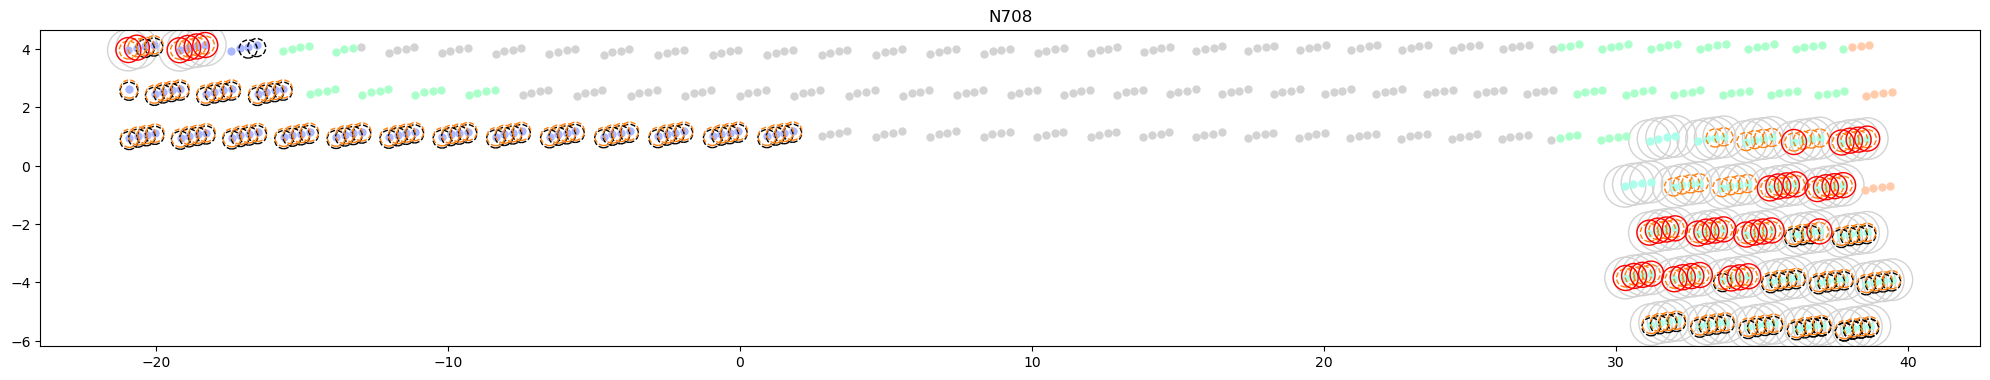

In [50]:
fig = plt.figure(figsize=(20,4))
ax = plt.subplot(111)
ax.set_aspect('equal')

fields = ocat['object'].str.extract(r'(.*?(?=_))')[0]
cc_l = ['#abb7ff','#abffeb','#abffcb','#feffab','#ffcbab','lightgrey']


plt.scatter ( wrapRA(hack_cat['RA']), hack_cat['dec'], facecolor='None', edgecolor='lightgrey', s=30**2)
for field in fields.unique():
    cat = ocat.loc[fields==field]
    idx = sigjson_f2022b._field_priorities[field]
    plt.scatter ( wrapRA(cat['RA']), cat['dec'], c=cc_l[idx], s=5**2)
    
plt.scatter ( wrapRA(coo_h.merian_sidecar['racenter']), 
             coo_h.merian_sidecar['deccenter'], facecolor='None', edgecolor='k', s=13**2, ls='--' )

plt.scatter ( wrapRA(ocat.loc[lastnightobjects,'RA']), ocat.loc[lastnightobjects,'dec'], 
             facecolor='None', edgecolor='C1', s=13**2, lw=1, ls='--' )
plt.scatter ( wrapRA(hcat.reindex(is_queued_halpha.loc[~is_queued_halpha['qstamp'].isna()].index)['RA']), 
                     hcat.reindex(is_queued_halpha.loc[~is_queued_halpha['qstamp'].isna()].index)['dec'], 
             facecolor='None', edgecolor='r', s=18**2, lw=1,  )

#plt.scatter ( wrapRA(truly_new_inN708['RA']), truly_new_inN708['dec'], facecolor='None', edgecolor='r', s=18**2, lw=1 )
#plt.scatter ( wrapRA(ocat.reindex(to_obs.index)['RA']), ocat.reindex(to_obs.index)['dec'], color='b', s=1)

plt.title('N708')
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/N708_20220930_prediction.png')

In [512]:
hack_queue = pd.DataFrame(index=hcat.index, columns=['is_queued','qstamp','airmass'])
#hack_queue.loc[truly_new_inN708.index, 'is_queued'] = True
hack_queue.loc[hcat.loc[np.in1d(hcat['object'], coo_h.merian_sidecar['object'])].index, 'is_queued'] = True
hack_queue.loc[truly_new_inN708.index, 'is_queued'] = True

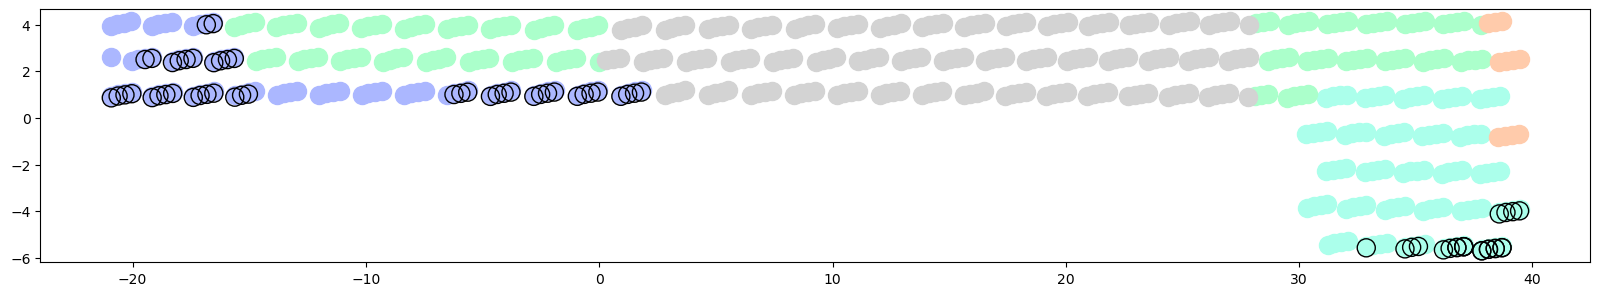

In [514]:
fig = plt.figure(figsize=(20,4))
ax = plt.subplot(111)
ax.set_aspect('equal')

for field in fields.unique():
    cat = ocat.loc[fields==field]
    idx = sigjson_f2022b.priorities[field]
    plt.scatter ( wrapRA(cat['RA']), cat['dec'], c=cc_l[idx], s=13**2)
    
plt.scatter ( wrapRA(ocat.reindex(grp.index)['RA']), ocat.reindex(grp.index)['dec'], facecolor='None', edgecolor=cc, s=18**2, lw=1 )
plt.scatter ( wrapRA(coo_h.merian_sidecar['racenter']), coo_h.merian_sidecar['deccenter'], facecolor='None', edgecolor='k', s=13**2 )
hq = hack_queue.reindex ( coo_h.merian_sidecar
plt.scatter ( wrapRA(hcat.reindex(

In [ ]:
is_queued = None
for idx in range(len(halpha_nights)):
    night = halpha_nights[idx]
    is_queued = sigjson_f2022b.plan_tomorrow( night[2], night[1], night[0], tele_fname, copilot_fname, mfilt='N708', is_queued=is_queued, pad_last_hour=False, maxairmass=1.8, save=False, verbose=False)
to_obs = is_queued.loc[~is_queued['qstamp'].isna()]

In [229]:
#night = obsdates[4]
#newq = sigjson_f2022b.plan_tomorrow( night[2], night[1], night[0], tele_fname, copilot_fname, mfilt='N540', is_queued=is_queued, pad_last_hour=False, maxairmass=1.6, save=False)
    

In [506]:
5 - (5.*10./15.)

1.6666666666666665

In [199]:
coo_o.merian_sidecar.loc[coo_o.merian_sidecar['racenter'] > 300., 'racenter'].min()

340.8357782548524

In [202]:
coo_h.merian_sidecar.loc[coo_h.merian_sidecar['racenter'] > 300., 'racenter'].min()

339.08456994156114